In [4]:
import pandas as pd
import numpy as np
import json 
import networkx as nx 
import linkpred

ModuleNotFoundError: No module named 'linkpred'

In [9]:
with open('../data_collection/data/tuscany_init.json') as jf:
    data = json.load(jf)
    
len(data)

15863

In [10]:
tuscany = dict()

for restaurant, reviews in data.items():
    if len(reviews)>0 : tuscany[restaurant] = dict()
    else: continue
    for review in reviews : 
        username = review['username']
        date = review['date']
        
        if username not in tuscany[restaurant] : tuscany[restaurant][username] = [date]
        else:                                    tuscany[restaurant][username].append(date)

In [11]:
with open('../data_collection/data/tuscany_alldates.json','w+') as jf:
    json.dump(tuscany,jf)

In [3]:
with open('../data_collection/data/tuscany_alldates.json') as jf:
    tuscany = json.load(jf)

FileNotFoundError: [Errno 2] No such file or directory: '../data_collection/data/tuscany_alldates.json'

In [71]:
len(tuscany)

15863

In [72]:
tuscanyCovid = dict()
for restaurant, reviews in tuscany.items():
    tuscanyCovid[restaurant] = dict()
    for reviewer,dates in reviews.items() : 
        tuscanyCovid[restaurant][reviewer] = [int(date) for date in dates if int(date) >= 20200000]

In [38]:
deleteRestaurants = []
deleteReviewers = dict()
for restaurant, reviews in tuscanyCovid.items():
    if len(reviews)==0 : deleteRestaurants.append(restaurant)
    else: 
        
        for reviewer,dates in reviews.items() : 
            
            if len(dates)==0: 
                if restaurant in deleteReviewers: deleteReviewers[restaurant].append(reviewer)
                else : deleteReviewers[restaurant] = [reviewer]

In [39]:
for restaurant in deleteRestaurants: tuscanyCovid.pop(restaurant)


In [36]:
for restaurant in deleteReviewers:
    for reviewer in deleteReviewers[restaurant]:
         tuscanyCovid[restaurant].pop(reviewer)

In [38]:
deleteRestaurants = []
deleteReviewers = dict()
for restaurant, reviews in tuscanyCovid.items():
    if len(reviews)==0 : deleteRestaurants.append(restaurant)
    else: 
        
        for reviewer,dates in reviews.items() : 
            
            if len(dates)==0: 
                if restaurant in deleteReviewers: deleteReviewers[restaurant].append(reviewer)
                else : deleteReviewers[restaurant] = [reviewer]

In [39]:
for restaurant in deleteRestaurants: tuscanyCovid.pop(restaurant)


In [80]:
G = nx.MultiDiGraph()

In [75]:
tuscany = tuscanyCovid

In [77]:
with open('../data_collection/data/tuscanyCovid.json','w+') as jf:
    json.dump(tuscany,jf)

In [82]:
for i,reviews_i in tuscany.items():
    if int(i) % 1000 == 0: print(i, end= ' ')
    if len(tuscany[str(i)])==0: continue
    reviewers_i = set(reviews_i.keys())

    for j, reviews_j in list(tuscany.items())[int(i)+1:]:
        if len(tuscany[str(j)])==0: continue

        reviewers_j = set(reviews_j.keys())
       
        intersection = list(reviewers_i.intersection(reviewers_j))
        if len(intersection) > 0:
            for reviewer in intersection:
                dates_i = reviews_i[reviewer]
                dates_j = reviews_j[reviewer]
               
                datepairs = []
                for date_i in dates_i: 
                    for date_j in dates_j:

                        if date_i < date_j:  G.add_edge(i,j, start=date_i,end=date_j)
                        elif date_i > date_j:  G.add_edge(j,i, start=date_j,end=date_i)
                        else: 
                            G.add_edge(j,i, start=date_j,end=date_i)
                            G.add_edge(i,j, start=date_i,end=date_j)

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 

In [84]:
nx.write_graphml(G,'../data/multicoviddigraph.graphml')

In [86]:
len(G.edges)

225902

In [5]:
with open('../data_collection/data/tuscany_alldates.json') as jf:
    tuscany = json.load(jf)

FileNotFoundError: [Errno 2] No such file or directory: '../data_collection/data/tuscany_alldates.json'

In [3]:
tuscanyCovid = dict()
for restaurant, reviews in tuscany.items():
    tuscanyCovid[restaurant] = dict()
    for reviewer,dates in reviews.items() : 
        tuscanyCovid[restaurant][reviewer] = [int(date) for date in dates if int(date) >= 20200224]

In [5]:
tuscany = tuscanyCovid

In [6]:
tuscanyCovid = dict()
for restaurant, reviews in tuscany.items():
    for reviewer,dates in reviews.items() : 
        if reviewer not in tuscanyCovid: tuscanyCovid[reviewer] = list()
        for date in dates:
            tuscanyCovid[reviewer].append((restaurant,date))

In [7]:
with open('../data_collection/data/tuscanyCovidReviewer.json','w+') as jf:
    json.dump(tuscanyCovid,jf)

In [2]:
with open('../data_collection/data/tuscanyCovidReviewer.json','w+') as jf:
    tuscany = json.load(jf)

FileNotFoundError: [Errno 2] No such file or directory: '../data_collection/data/tuscanyCovidReviewer.json'

In [8]:
tuscany = tuscanyCovid

In [9]:
G = nx.MultiDiGraph()

In [22]:
sum([len(r)-1 for r in tus.values()])

48945

In [23]:
len(tus)

24653

In [7]:
from tqdm.notebook import tqdm

In [24]:
for reviewer, reviews in tqdm(tuscany.items()):
    reviews.sort(key = lambda x: x[1])
    for i,review in enumerate(reviews): 
        restaurant_i, date_i = review
        if len(reviews) > i + 1 :
            restaurant_j, date_j = reviews[i+1]
            G.add_edge(restaurant_i,restaurant_j, start=date_i,end=date_j,user = reviewer)
            if date_i == date_j: G.add_edge(restaurant_j,restaurant_i, start=date_j,end=date_i,user = reviewer)
            
        

  0%|          | 0/1021021 [00:00<?, ?it/s]

In [25]:
len(G.edges)

72098

In [26]:
nx.write_graphml(G,'../data/covidByUser.graphml')

In [114]:
C = nx.read_graphml('../data/covidByUser.graphml')

In [117]:
len(C.edges)

93020

In [28]:
tuscanyCovid = dict()
for reviewer, reviews in tqdm(tuscany.items()):
    if len(reviews) > 1 : tuscanyCovid[reviewer] = {review[1]: list() for review in reviews}
    else: continue
    for review in reviews:
        restaurant, date = review
        tuscanyCovid[reviewer][date].append(restaurant)
    

  0%|          | 0/1021021 [00:00<?, ?it/s]

In [21]:
G = nx.MultiDiGraph()
tuscany = tuscanyCovid

In [50]:

from itertools import product
from itertools import permutations 


[i for i in product(sorted(mydict),2)]

TypeError: 'int' object is not iterable

In [18]:


from itertools import product
from itertools import permutations
list(product([1,2,3],['a','b']))

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')]

In [22]:


from itertools import product
from itertools import permutations


for reviewer, allreviews in tqdm(tuscany.items()):

    allreviews = {k:v for k,v in sorted(allreviews.items())}
    for i, date_i in enumerate(allreviews): 
        reviews_i = allreviews[date_i]
        if len(reviews_i) > 1 :
            newedges = permutations(reviews_i,2)
            for u,v in newedges:
                G.add_edge(u,v, start=date_i,end=date_i,user = reviewer)
             
        
        if len(allreviews) > i + 1 :
            date_j = list(allreviews)[i+1]
            reviews_j = allreviews[date_j]
            newedges = product(reviews_i,reviews_j)
            for u,v in newedges:
                G.add_edge(u,v, start=date_i,end=date_j,user = reviewer)
               
            
        

  0%|          | 0/24653 [00:00<?, ?it/s]

In [36]:
for e in G.edges:
    if G.edges[e]['user'] == 'Giu_8a':
        print(e,G.edges[e])

('8656', '14252', 0) {'start': 20200811, 'end': 20200911, 'user': 'Giu_8a'}
('8827', '8766', 0) {'start': 20200308, 'end': 20200308, 'user': 'Giu_8a'}
('8827', '8125', 0) {'start': 20200308, 'end': 20200713, 'user': 'Giu_8a'}
('10842', '8656', 0) {'start': 20200809, 'end': 20200811, 'user': 'Giu_8a'}
('14492', '8766', 0) {'start': 20200228, 'end': 20200308, 'user': 'Giu_8a'}
('14492', '8827', 0) {'start': 20200228, 'end': 20200308, 'user': 'Giu_8a'}
('8766', '8827', 0) {'start': 20200308, 'end': 20200308, 'user': 'Giu_8a'}
('8766', '8125', 0) {'start': 20200308, 'end': 20200713, 'user': 'Giu_8a'}
('8125', '8655', 0) {'start': 20200713, 'end': 20200719, 'user': 'Giu_8a'}
('8655', '10842', 0) {'start': 20200719, 'end': 20200809, 'user': 'Giu_8a'}
('14252', '10642', 0) {'start': 20200911, 'end': 20200913, 'user': 'Giu_8a'}
('14252', '11418', 0) {'start': 20200911, 'end': 20200913, 'user': 'Giu_8a'}
('10642', '11418', 0) {'start': 20200913, 'end': 20200913, 'user': 'Giu_8a'}
('11418', '106

In [38]:
nx.write_graphml(G,'../data/covidByUser.graphml')

In [53]:
len(G.edges)

111863

In [27]:
users = dict()

for e in G.edges:
    u,v,_ = e
    username = G.edges[e]['user']
    if username not in users: 
        users[username] = {'visited':set()}
        
    
    users[username]['visited'].add(u)
    users[username]['visited'].add(v)
     

In [28]:
for user in users: 
    users[user]['n_visited'] = len(users[user]['visited'])

In [30]:
user = dict()
for e in G.edges:
    if  G.edges[e]['user'] == 'Giu_8a': 
        user[e] = G.edges[e]

In [31]:
nodebydate = dict()

for e in user:
    u,v,_ = e
    start = user[e]['start']
    end = user[e]['end']
    if start not in nodebydate: nodebydate[start] = list()
    if end not in nodebydate: nodebydate[end] = list()
    nodebydate[start].append(u)
    nodebydate[end].append(v)

In [32]:
g = nx.DiGraph()
for e in user:
    u,v,_ = e
    g.add_edge(u,v)

In [44]:


positions = dict()
width = 10 
height = 5

for i, date in enumerate(sorted(nodebydate.keys(),reverse=False)):
    x = i 
    reviews = nodebydate[date]
    for j, restaurant in enumerate(reviews): 
        y = (height / (len(reviews)+1)) * (j+1)
        positions[restaurant] = (x,y)

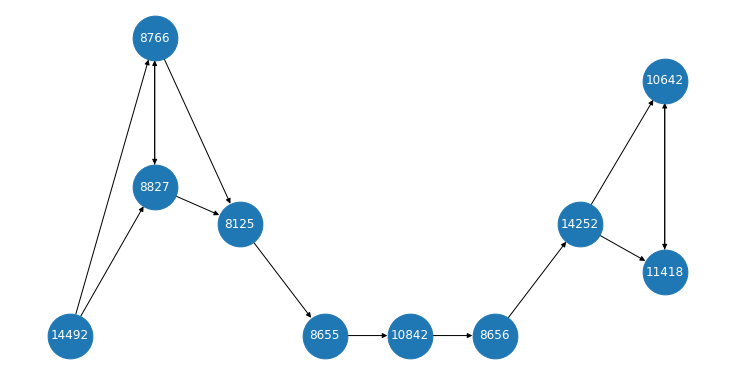

In [52]:
from matplotlib import pyplot as plt 

plt.figure(figsize=(width,height))
           
nx.draw(g, pos= positions, with_labels=True,node_size =2000, font_color='w')

In [5]:
with open('../data/tuscanyCovidReviewer.json','r') as jf:
    tuscany = json.load(jf) 

In [8]:
tuscanyCovid = dict()
for reviewer, reviews in tqdm(tuscany.items()):
    if len(reviews) > 1 : tuscanyCovid[reviewer] = {review[1]: list() for review in reviews}
    else: continue
    for review in reviews:
        restaurant, date = review
        tuscanyCovid[reviewer][date].append(restaurant)
    

  0%|          | 0/1021021 [00:00<?, ?it/s]

In [14]:
tuscanyCovid['562marim'])

57

In [19]:
allreviews = {k:v for k,v in sorted(tuscanyCovid['Giu_8a'].items())}

In [20]:
allreviews

{20200228: ['14492'],
 20200308: ['8766', '8827'],
 20200713: ['8125'],
 20200719: ['8655'],
 20200809: ['10842'],
 20200811: ['8656'],
 20200911: ['14252'],
 20200913: ['10642', '11418']}